In [1]:
#!/usr/bin/env python

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import pylab as pl
import seaborn as sn

import random
import sys

from sklearn.model_selection import train_test_split
from sklearn import metrics

from pandas import set_option
pd.options.mode.chained_assignment = None

from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from scipy.stats import truncnorm
from scipy.stats import pearsonr
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [2]:
def ML_train(estimator, X_tr, y_tr):
    train = estimator.fit(X_tr, y_tr)
    pred = estimator.predict(X_tr)

    # Cross validation
    cvscore = cross_val_score(estimator, X_tr, y_tr, cv=5, n_jobs=10)
    score = cvscore.mean()
    print("Score with the entire dataset = %.2f" % score)
    print("mean absolute error: ", mean_absolute_error(y_tr, pred))
    print("mean squared error: ", mean_squared_error(y_tr, pred))
    print("r2 score: ", r2_score(y_tr, pred))
    print("pearson r: ", pearsonr(y_tr, pred))

    return estimator


def ML_Pred(estimator, X_te, y_te):
    pred = estimator.predict(X_te)

    print("Evaluate the error on the test data.")
    print("mean absolute error: ", mean_absolute_error(y_te, pred))
    print("mean squared error: ", mean_squared_error(y_te,pred))
    print("r2 score: ", r2_score(y_te, pred))
    print("pearson r: ", pearsonr(y_te, pred))

    return pred

In [3]:
class MLPlot:
    
    # Edit the font, font size, and axes width
    mpl.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['font.size'] = 24
    plt.rcParams['axes.linewidth'] = 3
    
    def __init__(self, X, y, MLestimator):
        #X = MLdata[:,:-2]
        #y = MLdata[:,-1]
        #X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = testsize, random_state = rstate)
        #self.qm = y_test
        #self.ml = MLestimator.predict(X_test)
        self.qm = y
        self.ml = MLestimator.predict(X)
        
    # Plot outputs
    def corrplot(self):
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot()

        plt.plot(self.qm, self.ml,'ro',fillstyle='none')
        
        # determine the range
        qm_max=np.max(self.qm)
        qm_min=np.min(self.qm)
        ml_max=np.max(self.ml)
        ml_min=np.min(self.ml)
        sigma=np.std(self.qm)+np.std(self.ml)
        ax_low=min(qm_min,ml_min)-sigma
        ax_up=max(qm_max,ml_max)+sigma
        
        plt.xlim(ax_low,ax_up)
        plt.ylim(ax_low,ax_up)
        plt.plot([ax_low,ax_up],[ax_low,ax_up], '--b')

        plt.xlabel('QM i-RESP charge (e)')
        plt.ylabel('ML charge (e)')
        
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())
        ax.tick_params(axis='both', which='major', direction='in', length=14, width=4, color='k')
        ax.tick_params(axis='both', which='minor', direction='in', length=8, width=2, color='k')


        #ax.xaxis.grid(True, which='minor')
        # square figure
        ax.set_aspect('equal', adjustable='box')
        plt.show()
    
    
    def cmplot(self):
        '''
        plot the reference and predicted data for direct comparison
        '''
        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot()
        skip = int(len(self.qm)/1000)
        plt.plot(self.qm[::skip], color='red', marker='o', linewidth=1, label = 'QM i-RESP charge (e)')
        plt.plot(self.ml[::skip], color='blue', marker='o', linewidth=1, label = 'ML charge (e)')
        plt.legend(loc='best')
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())
        ax.tick_params(axis='both', which='major', direction='in', length=14, width=4, color='k')
        ax.tick_params(axis='both', which='minor', direction='in', length=8, width=2, color='k')
        
        plt.xlabel('Index')
        plt.ylabel('Atomic charge (e)')
        plt.show()

In [8]:
# Read the data from a text file
csv = pd.read_csv('Ca_all_data.txt', delimiter=',', header=None)

In [9]:
csv.shape

(7817, 127)

In [5]:
name = list()
ele_tup=('H','C','N','O','Ca')
for i in range(1,13):
    name.append(f'deg_r{i:d}')
    name.append(f'bet_r{i:d}')
    name.append(f'clust_r{i:d}')
    name.append(f'clos_r{i:d}')
for i in ('Ca','wat'):
    name.append('deg_'+i)
    name.append('bet_'+i)
    name.append('clust_'+i)
    name.append('clos_'+i)
for cut in (2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0):
    for i in ele_tup:
        name.append(i+f'_{cut:2.1f}')
for cut in (3.0,6.0):
    for i in range(5):
        for j in range(i+1):
            name.append(ele_tup[j]+ele_tup[i]+f'_{cut:2.1f}')
name.append('Cachg')

In [6]:
csv.columns=name
csv=csv[csv.columns.drop(list(csv.filter(regex='Ca_')))]

In [7]:
csv.shape

(7817, 109)

In [143]:
rstate = 185054330

185054330

In [133]:
feat=csv[csv.columns[56:-1]]
chg=csv[csv.columns[-1]]

X_tr, X_te, y_tr, y_te = train_test_split(feat, chg, test_size=0.3)

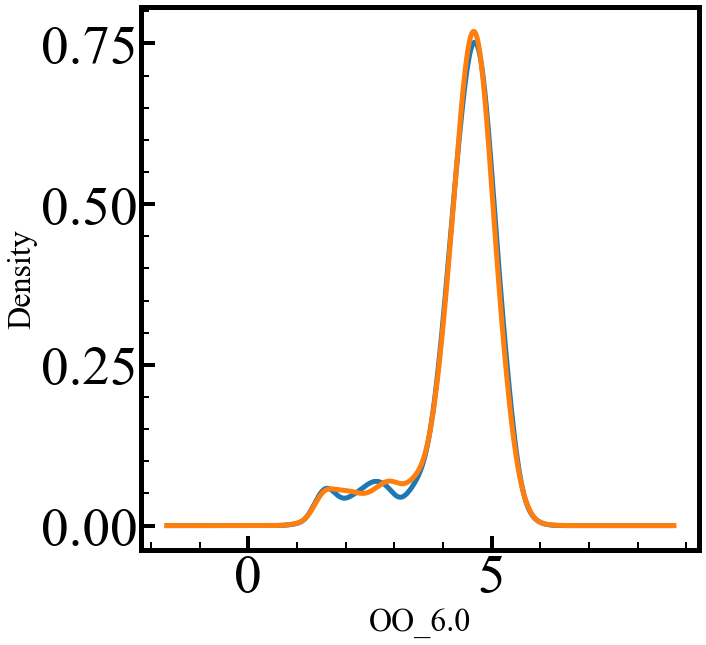

In [134]:
plt.rcParams["figure.figsize"]=(10,10)
mpl.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 32
plt.rcParams['axes.linewidth'] = 5
nn6_tr=X_tr['OO_6.0']
nn6_te=X_te['OO_6.0']

ax = nn6_tr.plot.density(lw=5,label="training")
bx = nn6_te.plot.density(lw=5,label="test")
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis='both', which='major', direction='in', length=14, width=4, color='k')
ax.tick_params(axis='both', which='minor', direction='in', length=8, width=2, color='k')

plt.xlabel('OO_6.0')
#plt.ylabel('Atomic charge (e)')
plt.savefig("OO_6.0.pdf", format="pdf")

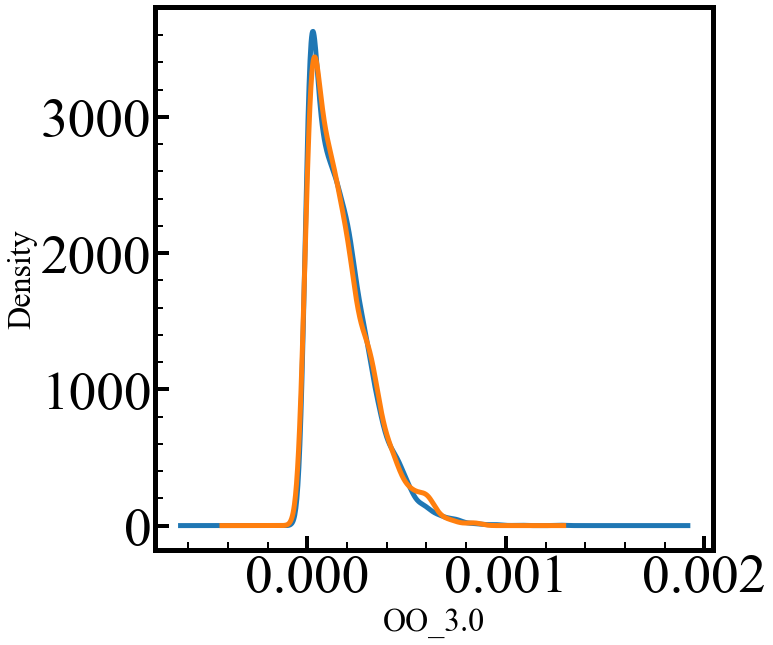

In [135]:
#plt.rcParams["figure.figsize"]=(5,5)
oo3_tr=X_tr['OO_3.0']
oo3_te=X_te['OO_3.0']

ax = oo3_tr.plot.density(lw=5)
bx = oo3_te.plot.density(lw=5)

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis='both', which='major', direction='in', length=14, width=4, color='k')
ax.tick_params(axis='both', which='minor', direction='in', length=8, width=2, color='k')
plt.xlabel('OO_3.0')

plt.savefig("OO_3.0.pdf", format="pdf")

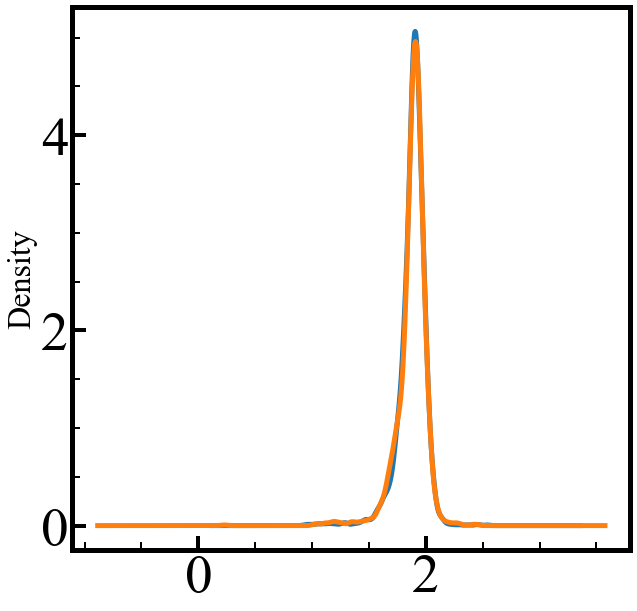

In [136]:
#plt.rcParams["figure.figsize"]=(5,5)
ax = y_tr.plot.density(lw=5)
bx = y_te.plot.density(lw=5)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis='both', which='major', direction='in', length=14, width=4, color='k')
ax.tick_params(axis='both', which='minor', direction='in', length=8, width=2, color='k')
plt.savefig("charge_iRESP.pdf", format="pdf")

In [ ]:
# those hyperparameters seem to be optimized through multiple cross-validation runs
RFR=RandomForestRegressor(random_state = rstate, criterion = 'mae', n_estimators = 500, oob_score = True, n_jobs = 10)
RFRpipe = ML_train(RFR, X_tr, y_tr)

In [62]:
y_pred = ML_Pred(RFRpipe, X_te, y_te)
from scipy.stats.stats import pearsonr
print(pearsonr(y_te, y_pred))
print(pearsonr(y_tr, ML_Pred(RFRpipe, X_tr, y_tr)))

Evaluate the error on the test data.
mean absolute error:  0.05613200170502991
mean squared error:  0.007046383419161472
r2 score:  0.5298949216065908
(0.7279989479022324, 0.0)
Evaluate the error on the test data.
mean absolute error:  0.021234735825260614
mean squared error:  0.0010729110795079603
r2 score:  0.9323109973436797
(0.9746789548709017, 0.0)


In [63]:
importances = RFRpipe.feature_importances_

In [64]:
importances.argsort()

array([107, 106,  56,  59,  60,  63,  67,  75,  79,  83,  71,  91,  90,
        87,  92,  96,  97,  64,  89,  88,  40,  36,  24,  28,  38,  42,
        16,  12,  44,   8,  32,  68,   0,  52,  20,  39,  31,  19,  47,
        11,  23,   3,  57,  58,  94,   6,  43,  48,  27,  35,  22,  14,
        55,   4,  30,  15,  10,  54,  82,  81,  77,  26,  78,  18,  34,
        46,  80,  41,  70,  69,  50,  74,  66,  65,  73, 105,  84,  61,
         5,  76,  62,  93,  86,  72,  85,  53, 102,  21,  13,   2,  17,
       101,  29,  25,  33, 100,  51,  99,  49,  45,  98,   7,   9, 103,
       104,  37,   1,  95])

In [65]:
sorted(importances)

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 8.602616481197381e-05,
 0.0004171808259835878,
 0.0011433121811048293,
 0.0012225310028576059,
 0.001260584695480153,
 0.002260400441307638,
 0.0022999477050003885,
 0.0024261170574755436,
 0.0026018976251914573,
 0.002615425447060294,
 0.002712636081255099,
 0.0030248966331628603,
 0.003083933312853485,
 0.0032620956960269297,
 0.0033313797009208277,
 0.003349329014429407,
 0.0033800402624844243,
 0.003392672078974149,
 0.003398045907033248,
 0.00341462056648122,
 0.003506963220934713,
 0.0038664488167887276,
 0.004025523117891866,
 0.0042991021494812615,
 0.004429479027131869,
 0.004653335359814341,
 0.0047496531947678455,
 0.00479670823082988,
 0.004807182055856483,
 0.0049662822639493735,
 0.005129257932300505,
 0.005431860686324676,
 0.005464789670228206,
 0.0058917266288450705,
 0.005969509777766031,
 0.0064256759308254805,
 0.006638674242961308,
 0.007122413264993395,
 0.007216

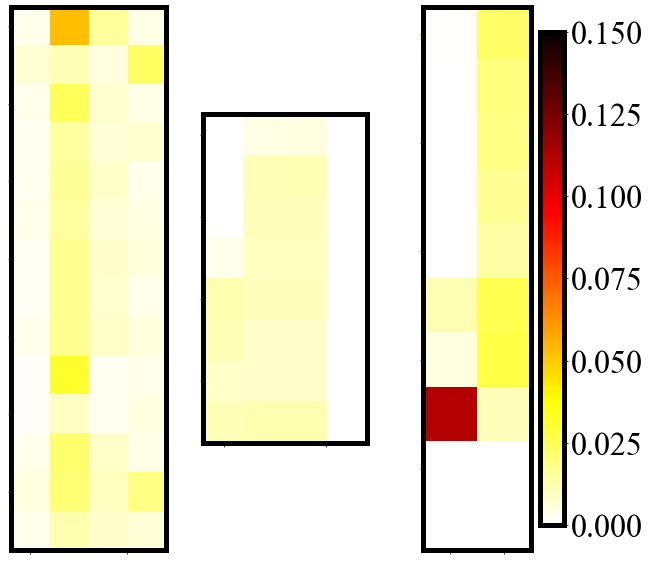

In [66]:
plt.rcParams["figure.figsize"]=(10,10)
plt.rcParams["axes.titlesize"]="large"

network_imp = np.reshape(importances[:56],(14,4))
g0_imp = np.reshape(importances[56:88],(8,4))
g1_imp = np.reshape(importances[88:],(2,10))
g1_imp = np.transpose(g1_imp)
import pylab
import numpy             as np
import matplotlib        as mpl
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import make_axes_locatable
upper = plt.cm.jet(np.arange(256))
lower = np.ones((int(256/3),4))
for i in range(3):
  lower[:,i] = np.linspace(1, upper[0,i], lower.shape[0])

base = np.ones((int(256/3),4))
cmap = np.vstack((base, lower))
cmap = np.vstack((cmap, upper))

cmap = mpl.colors.ListedColormap(cmap, name='myColorMap', N=cmap.shape[0])


fig, ((ax1, ax2, ax3)) = plt.subplots(1,3)

plot_net = ax1.imshow(network_imp, cmap='hot_r',vmin=0, vmax=0.15,interpolation='none')
plot_g0 = ax2.imshow(g0_imp, cmap='hot_r',vmin=0, vmax=0.15,interpolation='none')
plot_g1 = ax3.imshow(g1_imp,cmap='hot_r',vmin=0, vmax=0.15,interpolation='none')
ax1.xaxis.set_ticklabels([])
ax1.yaxis.set_ticklabels([])
ax2.xaxis.set_ticklabels([])
ax2.yaxis.set_ticklabels([])
ax3.xaxis.set_ticklabels([])
ax3.yaxis.set_ticklabels([])
plt.colorbar(plot_g1)

In [ ]:
Caplot = MLPlot(X_tr, y_tr, RFRpipe)
Caplot.corrplot()
Caplot.cmplot()


Caplot = MLPlot(X_te, y_te, RFRpipe)
Caplot.corrplot()
Caplot.cmplot()

In [ ]:
from sklearn.feature_selection import SelectFromModel 
# Fit model using each importance as a threshold 
thresholds = sorted(estimator.feature_importances_, reverse=True) 

for thresh in thresholds: 
    # select features using threshold 
    selection = SelectFromModel(estimator, threshold=thresh, prefit=True) 
    select_X_train = selection.transform(X_tr) 

    # train model 
    selection_model = RandomForestRegressor(random_state = rstate, criterion = 'mae', n_estimators = 20, oob_score = True, n_jobs = 10)
    selection_model.fit(select_X_train, y_tr) 

    # eval model 
    select_X_te = selection.transform(X_te) 
    y_pred = selection_model.predict(select_X_te) 
        
    print("\t Threshold: ", thresh)
    print("\t r2: ", r2_score(y_tr, selection_model.predict(select_X_train)), "\t mae: ", mean_absolute_error(y_tr, selection_model.predict(select_X_train)))
    print("\t r2: ", r2_score(y_te, y_pred), "\t mae: ", mean_absolute_error(y_te, y_pred))
    #print("mean absolute error: ", mean_absolute_error(y_te, y_pred))
    #print("mean squared error: ", mean_squared_error(y_te, y_pred))
    #print("r2 score: ", r2_score(y_te, y_pred))

In [138]:
import xgboost as xgb

estimator = xgb.XGBRegressor(objective='reg:squarederror', 
                             eval_metric='mae', 
                             learning_rate=0.03, 
                             max_depth=5, 
                             min_child_weight=0.1, 
                             subsample=0.7, 
                             colsample_bytree=0.7, 
                             n_estimators=500,
                             importance_type='gain',
                             booster='gbtree')

XGBpipe = ML_train(estimator, X_tr, y_tr)
#ML_Pred(XGBpipe, X_te, y_te)

Score with the entire dataset = 0.43
mean absolute error:  0.041548032192372464
mean squared error:  0.003325321667177751
r2 score:  0.776829875423716
pearson r:  (0.8919197575171693, 0.0)


In [139]:
ML_Pred(XGBpipe, X_te, y_te)

Evaluate the error on the test data.
mean absolute error:  0.06289817837449291
mean squared error:  0.009414509881403126
r2 score:  0.4525794136640642
pearson r:  (0.6728285040037583, 3.89663902822723e-309)


array([1.9085176, 1.8474573, 1.8701704, ..., 2.0115776, 1.9290428,
       1.813979 ], dtype=float32)

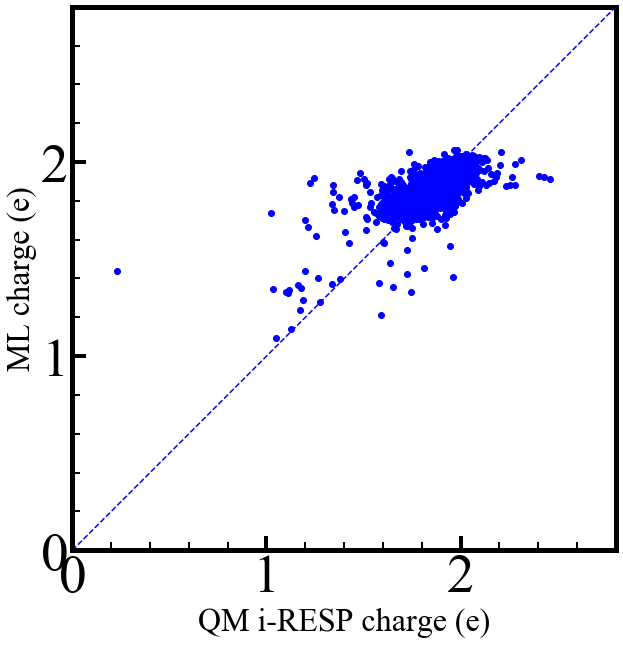

In [140]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

#plt.plot(y_tr, XGBpipe.predict(X_tr),'ko')
plt.plot(y_te, XGBpipe.predict(X_te),'bo')


# determine the range
ax_low=0
ax_up=2.8


plt.xlim(ax_low,ax_up)
plt.ylim(ax_low,ax_up)
plt.plot([ax_low,ax_up],[ax_low,ax_up], '--b')

plt.xlabel('QM i-RESP charge (e)')
plt.ylabel('ML charge (e)')

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis='both', which='major', direction='in', length=14, width=4, color='k')
ax.tick_params(axis='both', which='minor', direction='in', length=8, width=2, color='k')


#ax.xaxis.grid(True, which='minor')
# square figure
ax.set_aspect('equal', adjustable='box')
plt.show()

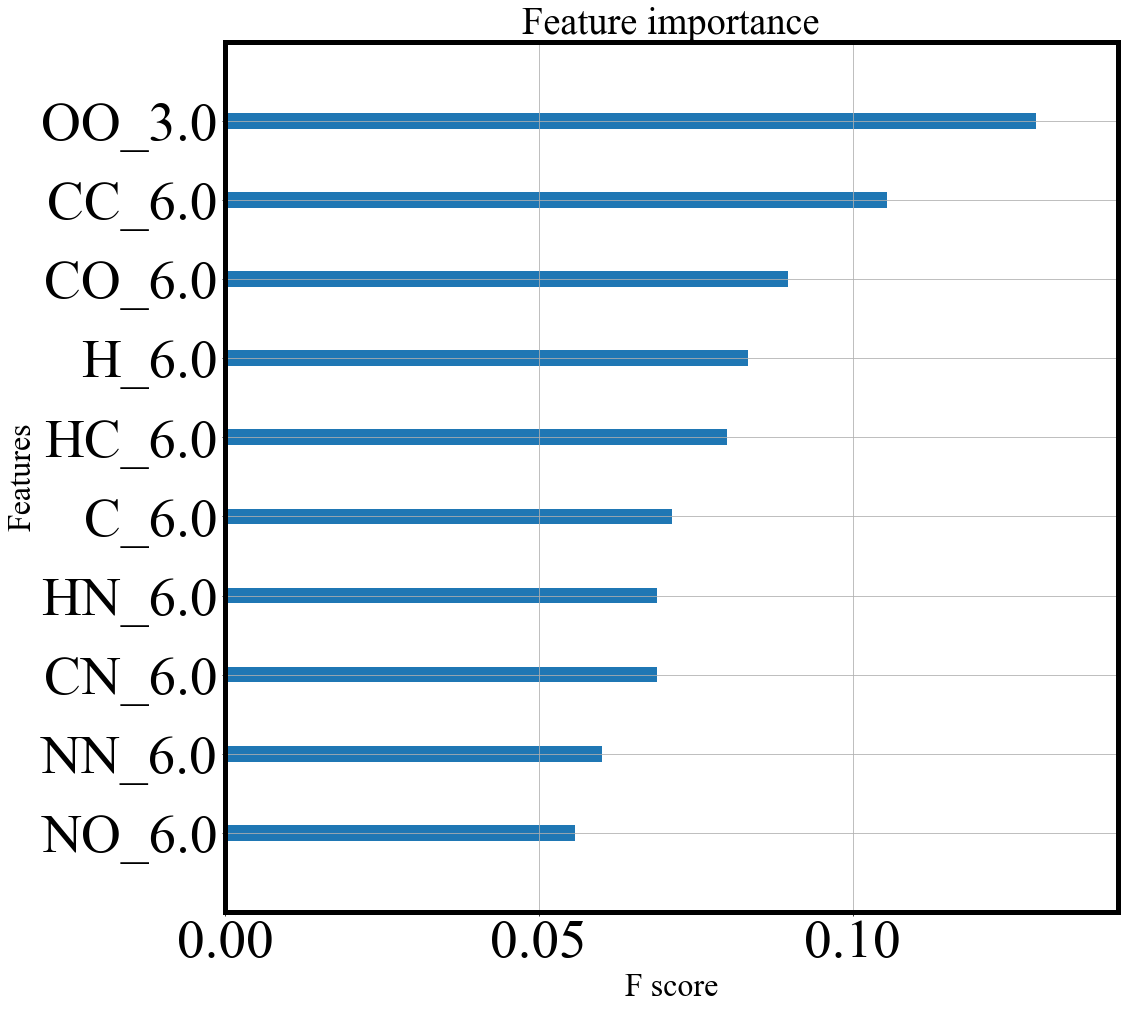

In [142]:
plt.rcParams["figure.figsize"]=(16,16)
#plt.rcParams["figure.titlesize"]="xx-small"
#plt.rcParams["axes.titlesize"]="large"
xgb.plot_importance(XGBpipe, max_num_features=10, importance_type='gain', show_values=False)
plt.savefig('symonly_xgboost_feat_imp.pdf',format='pdf')

In [82]:
importances=XGBpipe.get_booster().get_score(importance_type='gain')
feature_importances_=list()
for f in sorted(importances, key=lambda item: importances[item], reverse=True):
    feature_importances_.append((f,importances[f]))

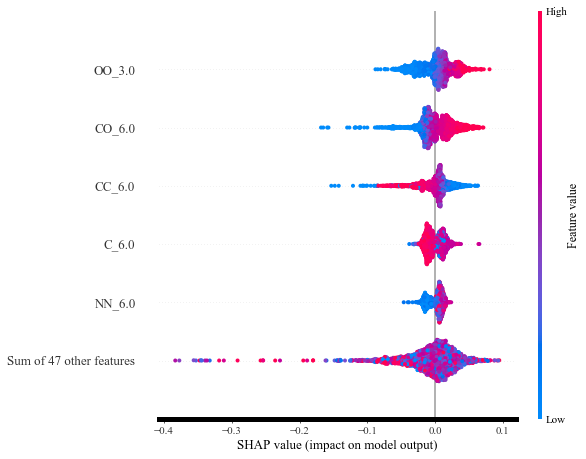

In [125]:
import shap

explainer = shap.Explainer(XGBpipe, algorithm='auto')
shap_values = explainer(X_te)

# visualize the first prediction's explanation
#plt.rcParams["axes.titlesize"]="large"
#plt.rcParams["ytick.labelsize"]="xx-large"
#plt.rcParams["xtick.labelsize"]="xx-large"
#plt.rcParams["figure.figsize"]=(16,10)

shap.plots.beeswarm(shap_values, max_display=6, plot_size=1)
#shap.plots.beeswarm(shap_values, max_display=10)

plt.show()
plt.savefig('symonly_xgboost_feat_beeswarm.pdf',format='pdf')

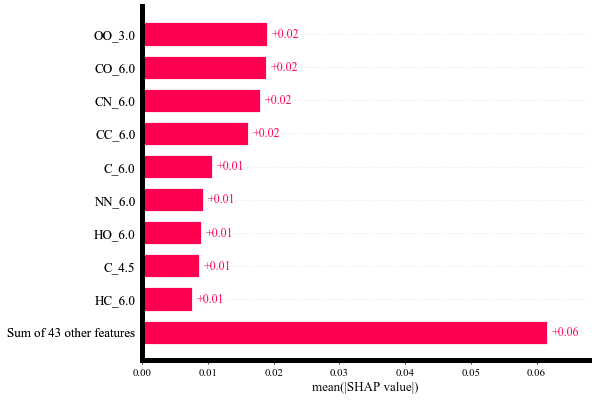

In [114]:
shap.plots.bar(shap_values.abs.mean(0), max_display=10)